   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0  2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83   0.0    0.00    1
1  3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0.0    0.00    1
2  4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0.0    0.00    1
3  5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07   0.0    0.00    1
4  6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07   0.0    0.26    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1     

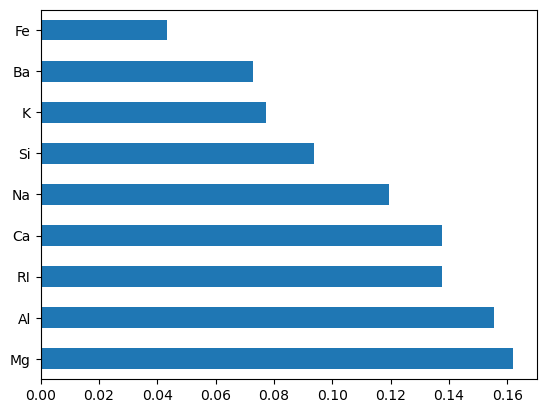

In [3]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
file_path = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv'
df = pd.read_csv(file_path)

# Step 3: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 4: Preprocess Data
# Rename columns for better readability (if needed)
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Check for missing values
print(df.isnull().sum())

# Step 5: Train-Test Split
X = df.drop(['Id', 'Type'], axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Evaluate Model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

# Display first few rows to understand the structure
print(df.head())

# Identify columns with non-numeric data
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Assume the last column is CGPA and the rest are course grades
x = df.iloc[:, 1:-1]  # Features: grades in different courses
y = df.iloc[:, -1]    # Target: CGPA

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]
MAE: 0.084772382